In [16]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

In [17]:
# 2. Создание новой базы данных и подключение
conn = sqlite3.connect('wine_quality.db')
cursor = conn.cursor()

In [18]:
# 3. Создание таблицы
create_table_query = '''
CREATE TABLE IF NOT EXISTS wine (
    fixed_acidity REAL,
    volatile_acidity REAL,
    citric_acid REAL,
    residual_sugar REAL,
    chlorides REAL,
    free_sulfur_dioxide REAL,
    total_sulfur_dioxide REAL,
    density REAL,
    pH REAL,
    sulphates REAL,
    alcohol REAL,
    quality INTEGER
);
'''
cursor.execute(create_table_query)
conn.commit()

df.to_sql('wine', conn, if_exists='replace', index=False)

1599

In [19]:
# 4. SQL-запросы для извлечения данных
query1 = 'SELECT * FROM wine WHERE quality = 8;'
result1 = pd.read_sql(query1, conn)
print("Данные с качеством вина 8:\n", result1.head())

Данные с качеством вина 8:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.9              0.35         0.46             3.6      0.078   
1           10.3              0.32         0.45             6.4      0.073   
2            5.6              0.85         0.05             1.4      0.045   
3           12.6              0.31         0.72             2.2      0.072   
4           11.3              0.62         0.67             5.2      0.086   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 15.0                  37.0   0.9973  3.35       0.86   
1                  5.0                  13.0   0.9976  3.23       0.82   
2                 12.0                  88.0   0.9924  3.56       0.82   
3                  6.0                  29.0   0.9987  2.88       0.82   
4                  6.0                  19.0   0.9988  3.22       0.69   

   alcohol  quality  
0     12.8        8  
1     12.6    

In [20]:
# 5. SQL-запросы с агрегатными функциями
query2 = 'SELECT AVG(alcohol) as avg_alcohol FROM wine;'
avg_alcohol = pd.read_sql(query2, conn)
print("Среднее содержание алкоголя:\n", avg_alcohol)

query3 = 'SELECT quality, COUNT(*) as count FROM wine GROUP BY quality;'
quality_count = pd.read_sql(query3, conn)
print("Количество каждого качества вина:\n", quality_count)

Среднее содержание алкоголя:
    avg_alcohol
0    10.422983
Количество каждого качества вина:
    quality  count
0        3     10
1        4     53
2        5    681
3        6    638
4        7    199
5        8     18


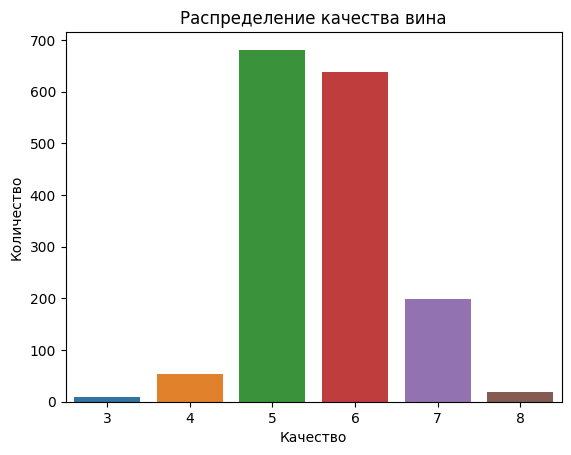

In [21]:
# 6.
# Гистограмма распределения качества вина
sns.countplot(x='quality', data=df)
plt.title('Распределение качества вина')
plt.xlabel('Качество')
plt.ylabel('Количество')
plt.show()

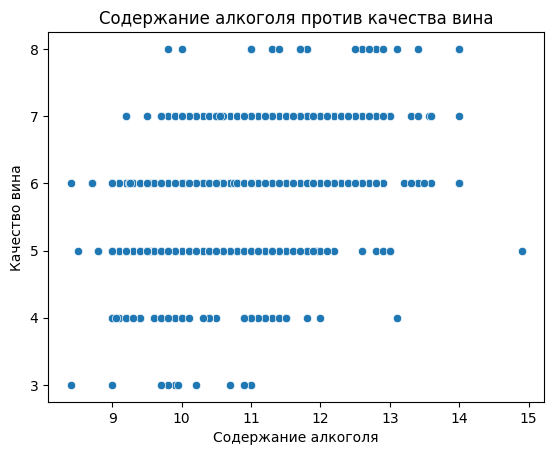

In [14]:
# Scatter plot: алкоголь против качества
sns.scatterplot(x='alcohol', y='quality', data=df)
plt.title('Содержание алкоголя против качества вина')
plt.xlabel('Содержание алкоголя')
plt.ylabel('Качество вина')
plt.show()

In [15]:
conn.close()